# Pandas ir NumPy demonstracinis failas



## 1. Duomenų įkėlimas ir susipažinimas su duomenimis

In [3]:

import pandas as pd
import numpy as np

# Sukuriame pavyzdinį duomenų rinkinį
duomenys = {
    'Vardas': ['Jonas', 'Ona', 'Petras', 'Ieva'],
    'Amžius': [25, 30, 45, 22],
    'Miestas': ['Vilnius', 'Kaunas', 'Klaipėda', 'Šiauliai'],
    'Pajamos': [1500, 2200, 1800, 1600]
}

df = pd.DataFrame(duomenys)

# Peržiūrime pirmas eilutes
print(df.head(7))

# Duomenų apibūdinimas
print(df.info())
print(df.describe())


   Vardas  Amžius   Miestas  Pajamos
0   Jonas      25   Vilnius     1500
1     Ona      30    Kaunas     2200
2  Petras      45  Klaipėda     1800
3    Ieva      22  Šiauliai     1600
<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Vardas   4 non-null      str  
 1   Amžius   4 non-null      int64
 2   Miestas  4 non-null      str  
 3   Pajamos  4 non-null      int64
dtypes: int64(2), str(2)
memory usage: 260.0 bytes
None
          Amžius      Pajamos
count   4.000000     4.000000
mean   30.500000  1775.000000
std    10.214369   309.569594
min    22.000000  1500.000000
25%    24.250000  1575.000000
50%    27.500000  1700.000000
75%    33.750000  1900.000000
max    45.000000  2200.000000


## 2. Filtravimas ir rikiavimas

In [3]:

# Filtruojame pagal amžių
filtruotas = df[df['Amžius'] > 25]
print(filtruotas)

# Rikiuojame pagal pajamas
rikiuota = df.sort_values(by='Pajamos', ascending=False)
print(rikiuota)


   Vardas  Amžius   Miestas  Pajamos
1     Ona      30    Kaunas     2200
2  Petras      45  Klaipėda     1800
   Vardas  Amžius   Miestas  Pajamos
1     Ona      30    Kaunas     2200
2  Petras      45  Klaipėda     1800
3    Ieva      22  Šiauliai     1600
0   Jonas      25   Vilnius     1500


## 3. Grupavimas

In [5]:

# Sukuriame papildomą stulpelį su regionu
df['Regionas'] = ['Vilnius', 'Kaunas', 'Klaipėda', 'Šiauliai']

# Grupavimas pagal regioną
grupavimas = df.groupby('Regionas')['Pajamos'].mean()
print(grupavimas)


Regionas
Kaunas      2200.0
Klaipėda    1800.0
Vilnius     1500.0
Šiauliai    1600.0
Name: Pajamos, dtype: float64


## 4. Apply naudojimas

In [5]:

# Funkcija mokesčiams apskaičiuoti
def apskaiciuoti_mokesti(pajamos):
    return pajamos * 0.2

df['Mokestis'] = df['Pajamos'].apply(apskaiciuoti_mokesti)
print(df)


   Vardas  Amžius   Miestas  Pajamos  Regionas  Mokestis
0   Jonas      25   Vilnius     1500   Vilnius     300.0
1     Ona      30    Kaunas     2200    Kaunas     440.0
2  Petras      45  Klaipėda     1800  Klaipėda     360.0
3    Ieva      22  Šiauliai     1600  Šiauliai     320.0


## 5. Lentelių sujungimas (Merge)

In [7]:

# Sukuriame papildomą lentelę su darbuotojo ID
papildoma = pd.DataFrame({
    'Vardas': ['Jonas', 'Ona', 'Petras', 'Ieva'],
    'DarbuotojoID': [1001, 1002, 1003, 1004]
})

sujungta = pd.merge(df, papildoma, on='Vardas')
print(sujungta)


   Vardas  Amžius   Miestas  Pajamos  Regionas  DarbuotojoID
0   Jonas      25   Vilnius     1500   Vilnius          1001
1     Ona      30    Kaunas     2200    Kaunas          1002
2  Petras      45  Klaipėda     1800  Klaipėda          1003
3    Ieva      22  Šiauliai     1600  Šiauliai          1004


## 6. Statistika

In [6]:

print("Vidutinės pajamos:", df['Pajamos'].mean())
print("Maksimalios pajamos:", df['Pajamos'].max())
print("Standartinis nuokrypis:", df['Pajamos'].std())


Vidutinės pajamos: 1775.0
Maksimalios pajamos: 2200
Standartinis nuokrypis: 309.56959368344513


## 7. Vizualizacija

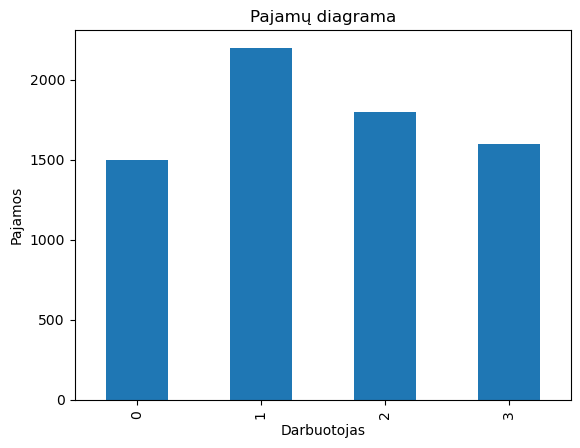

In [8]:

import matplotlib.pyplot as plt

df['Pajamos'].plot(kind='bar')
plt.title('Pajamų diagrama')
plt.xlabel('Darbuotojas')
plt.ylabel('Pajamos')
plt.show()


## 8. Series ir DataFrame kūrimas

In [9]:

# Series
serija = pd.Series([10, 20, 30, 40], name="Pavyzdys")
print(serija)

# DataFrame
duomenys2 = {'A': [1, 2], 'B': [3, 4]}
df2 = pd.DataFrame(duomenys2)
print(df2)


0    10
1    20
2    30
3    40
Name: Pavyzdys, dtype: int64
   A  B
0  1  3
1  2  4


## 9. Laiko eilutės (Time Series)

2025-01-01    0.314880
2025-01-02   -1.713930
2025-01-03   -1.062333
2025-01-04    1.370911
2025-01-05    1.419436
Freq: D, dtype: float64


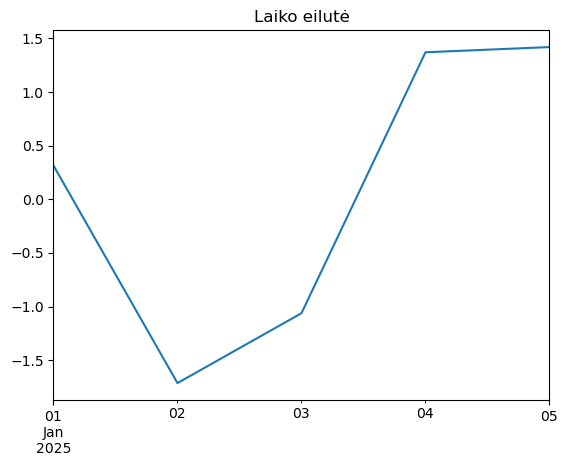

In [10]:

# Sukuriame laikines datas
datos = pd.date_range('2025-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=datos)
print(ts)

# Paprasta vizualizacija
ts.plot(title='Laiko eilutė')
plt.show()


## 10. Stulpelių/Įrašų šalinimas

In [11]:

# Šaliname stulpelį
df_be_regiono = df.drop('Regionas', axis=1)
print(df_be_regiono)

# Šaliname eilutę pagal indeksą
df_be_1_eilutes = df.drop(1, axis=0)
print(df_be_1_eilutes)


   Vardas  Amžius   Miestas  Pajamos  Mokestis
0   Jonas      25   Vilnius     1500     300.0
1     Ona      30    Kaunas     2200     440.0
2  Petras      45  Klaipėda     1800     360.0
3    Ieva      22  Šiauliai     1600     320.0
   Vardas  Amžius   Miestas  Pajamos  Regionas  Mokestis
0   Jonas      25   Vilnius     1500   Vilnius     300.0
2  Petras      45  Klaipėda     1800  Klaipėda     360.0
3    Ieva      22  Šiauliai     1600  Šiauliai     320.0


## 11. Indeksavimas

In [12]:

# Indeksų nustatymas
df_indeksuota = df.set_index('Vardas')
print(df_indeksuota)

# Indekso grąžinimas į paprastą stulpelį
df_originalu = df_indeksuota.reset_index()
print(df_originalu)


        Amžius   Miestas  Pajamos  Regionas  Mokestis
Vardas                                               
Jonas       25   Vilnius     1500   Vilnius     300.0
Ona         30    Kaunas     2200    Kaunas     440.0
Petras      45  Klaipėda     1800  Klaipėda     360.0
Ieva        22  Šiauliai     1600  Šiauliai     320.0
   Vardas  Amžius   Miestas  Pajamos  Regionas  Mokestis
0   Jonas      25   Vilnius     1500   Vilnius     300.0
1     Ona      30    Kaunas     2200    Kaunas     440.0
2  Petras      45  Klaipėda     1800  Klaipėda     360.0
3    Ieva      22  Šiauliai     1600  Šiauliai     320.0
